X-RAY IMAGE METADATA ANALYSIS
File: 4.png


FILE INFORMATION
File Name: 4.png
File Extension: .png
File Size: 1.4883 MB
Created: 2025-11-29 10:27:31
Modified: 2025-07-10 11:46:36

IMAGE PROPERTIES
Image Dimensions: 2850 x 1300
Number of Channels: 1
Total Pixels: 3,705,000
Data Type: uint8
Bit Depth: 8 bits per channel

COLOR SPACE INFORMATION
PIL Mode: L
Format: PNG
Is Grayscale: True
Has Alpha Channel: False

PIXEL INTENSITY STATISTICS
Min Intensity: 0.00
Max Intensity: 254.00
Mean Intensity: 106.19
Median Intensity: 115.00
Standard Deviation: 48.65
1st Percentile: 9.00
25th Percentile: 77.00
50th Percentile: 115.00
75th Percentile: 141.00
99th Percentile: 200.00

EXIF METADATA
No EXIF data found

PNG METADATA
gamma: 0.45455
chromaticity: (0.3127, 0.329, 0.64, 0.33, 0.3, 0.6, 0.15, 0.06)
dpi: (264.9474, 264.9474)
date:create: 2017-11-11T23:16:18-08:00
date:modify: 2013-07-13T05:29:41-07:00

HISTOGRAM ANALYSIS
Number of Bins: 256
Top 5 Peak Intensities: [145, 22, 126, 124, 129]
Total P

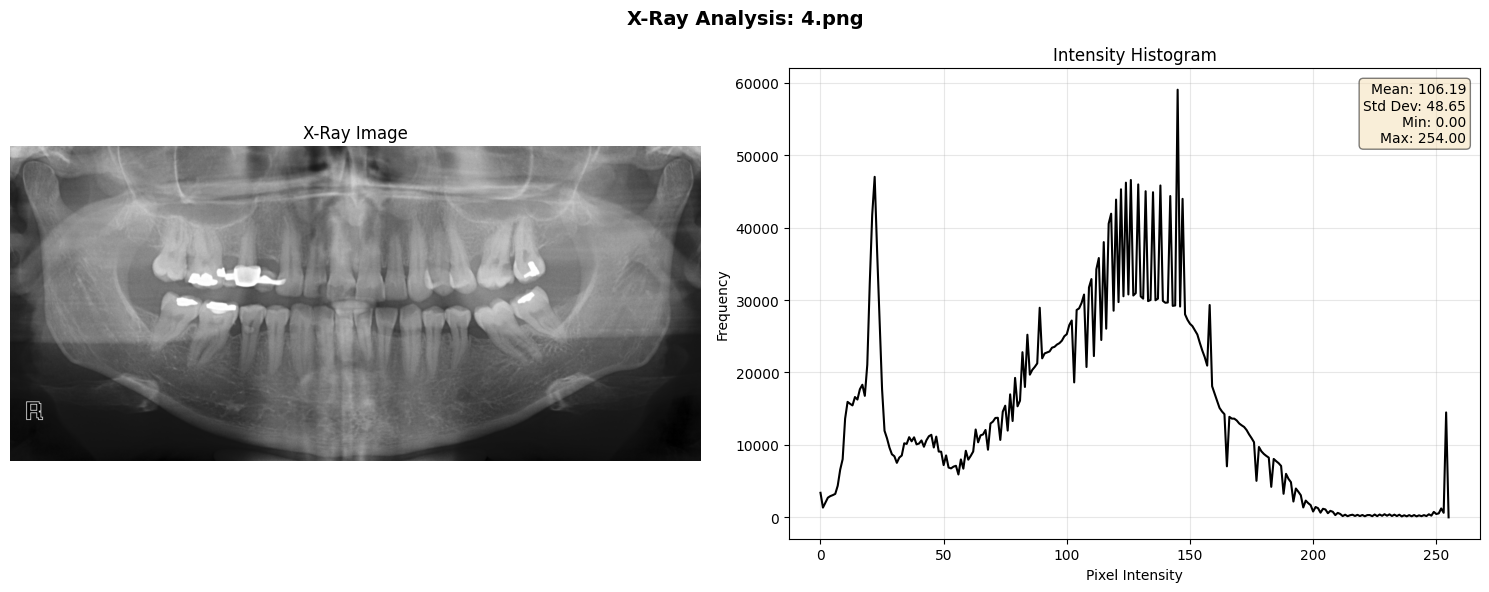


Metadata saved to: xray_metadata.json
Metadata text report saved to: xray_metadata.txt

✅ X-ray metadata extraction complete!


In [1]:
import cv2
import numpy as np
from PIL import Image
from PIL.ExifTags import TAGS
import os
import json
from datetime import datetime
import matplotlib.pyplot as plt

def get_xray_metadata(image_path):
    """
    Extract and display all metadata from X-ray image
    
    Args:
        image_path: Path to image file (PNG, JPG, DICOM, etc.)
    
    Returns:
        metadata_dict: Dictionary containing all metadata
    """
    print("="*70)
    print(f"X-RAY IMAGE METADATA ANALYSIS")
    print("="*70)
    print(f"File: {image_path}\n")
    
    metadata = {}
    
    # ====================
    # FILE INFORMATION
    # ====================
    print("\n" + "="*70)
    print("FILE INFORMATION")
    print("="*70)
    
    file_stats = os.stat(image_path)
    file_size_mb = file_stats.st_size / (1024 * 1024)
    
    metadata['file_info'] = {
        'file_path': image_path,
        'file_name': os.path.basename(image_path),
        'file_extension': os.path.splitext(image_path)[1],
        'file_size_bytes': file_stats.st_size,
        'file_size_mb': round(file_size_mb, 4),
        'creation_time': datetime.fromtimestamp(file_stats.st_ctime).strftime('%Y-%m-%d %H:%M:%S'),
        'modification_time': datetime.fromtimestamp(file_stats.st_mtime).strftime('%Y-%m-%d %H:%M:%S')
    }
    
    print(f"File Name: {metadata['file_info']['file_name']}")
    print(f"File Extension: {metadata['file_info']['file_extension']}")
    print(f"File Size: {metadata['file_info']['file_size_mb']:.4f} MB")
    print(f"Created: {metadata['file_info']['creation_time']}")
    print(f"Modified: {metadata['file_info']['modification_time']}")
    
    # ====================
    # IMAGE PROPERTIES (OpenCV)
    # ====================
    print("\n" + "="*70)
    print("IMAGE PROPERTIES")
    print("="*70)
    
    # Load with OpenCV
    img_cv = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    
    if img_cv is None:
        print("Warning: Could not load image with OpenCV")
        return metadata
    
    metadata['image_properties'] = {
        'height': int(img_cv.shape[0]),
        'width': int(img_cv.shape[1]),
        'channels': int(img_cv.shape[2]) if len(img_cv.shape) > 2 else 1,
        'total_pixels': int(img_cv.shape[0] * img_cv.shape[1]),
        'dtype': str(img_cv.dtype),
        'bit_depth': int(img_cv.itemsize * 8)
    }
    
    print(f"Image Dimensions: {metadata['image_properties']['width']} x {metadata['image_properties']['height']}")
    print(f"Number of Channels: {metadata['image_properties']['channels']}")
    print(f"Total Pixels: {metadata['image_properties']['total_pixels']:,}")
    print(f"Data Type: {metadata['image_properties']['dtype']}")
    print(f"Bit Depth: {metadata['image_properties']['bit_depth']} bits per channel")
    
    # ====================
    # COLOR SPACE & MODE
    # ====================
    print("\n" + "="*70)
    print("COLOR SPACE INFORMATION")
    print("="*70)
    
    img_pil = Image.open(image_path)
    
    metadata['color_info'] = {
        'mode': img_pil.mode,
        'format': img_pil.format,
        'is_grayscale': img_pil.mode in ['L', '1', 'LA'],
        'has_alpha': img_pil.mode in ['RGBA', 'LA', 'PA']
    }
    
    print(f"PIL Mode: {metadata['color_info']['mode']}")
    print(f"Format: {metadata['color_info']['format']}")
    print(f"Is Grayscale: {metadata['color_info']['is_grayscale']}")
    print(f"Has Alpha Channel: {metadata['color_info']['has_alpha']}")
    
    # ====================
    # PIXEL INTENSITY STATISTICS
    # ====================
    print("\n" + "="*70)
    print("PIXEL INTENSITY STATISTICS")
    print("="*70)
    
    # Convert to grayscale for analysis if needed
    if len(img_cv.shape) == 3:
        img_gray = cv2.cvtColor(img_cv, cv2.COLOR_BGR2GRAY)
    else:
        img_gray = img_cv
    
    metadata['intensity_stats'] = {
        'min_value': float(img_gray.min()),
        'max_value': float(img_gray.max()),
        'mean_value': float(img_gray.mean()),
        'median_value': float(np.median(img_gray)),
        'std_deviation': float(img_gray.std()),
        'percentile_1': float(np.percentile(img_gray, 1)),
        'percentile_25': float(np.percentile(img_gray, 25)),
        'percentile_50': float(np.percentile(img_gray, 50)),
        'percentile_75': float(np.percentile(img_gray, 75)),
        'percentile_99': float(np.percentile(img_gray, 99))
    }
    
    print(f"Min Intensity: {metadata['intensity_stats']['min_value']:.2f}")
    print(f"Max Intensity: {metadata['intensity_stats']['max_value']:.2f}")
    print(f"Mean Intensity: {metadata['intensity_stats']['mean_value']:.2f}")
    print(f"Median Intensity: {metadata['intensity_stats']['median_value']:.2f}")
    print(f"Standard Deviation: {metadata['intensity_stats']['std_deviation']:.2f}")
    print(f"1st Percentile: {metadata['intensity_stats']['percentile_1']:.2f}")
    print(f"25th Percentile: {metadata['intensity_stats']['percentile_25']:.2f}")
    print(f"50th Percentile: {metadata['intensity_stats']['percentile_50']:.2f}")
    print(f"75th Percentile: {metadata['intensity_stats']['percentile_75']:.2f}")
    print(f"99th Percentile: {metadata['intensity_stats']['percentile_99']:.2f}")
    
    # ====================
    # EXIF DATA (if available)
    # ====================
    print("\n" + "="*70)
    print("EXIF METADATA")
    print("="*70)
    
    exif_data = {}
    try:
        exif_raw = img_pil._getexif()
        if exif_raw:
            for tag_id, value in exif_raw.items():
                tag_name = TAGS.get(tag_id, tag_id)
                # Convert bytes to string if necessary
                if isinstance(value, bytes):
                    try:
                        value = value.decode('utf-8')
                    except:
                        value = str(value)
                exif_data[tag_name] = value
            
            metadata['exif_data'] = exif_data
            
            for key, value in exif_data.items():
                print(f"{key}: {value}")
        else:
            print("No EXIF data found")
            metadata['exif_data'] = {}
    except Exception as e:
        print(f"No EXIF data available: {str(e)}")
        metadata['exif_data'] = {}
    
    # ====================
    # PNG INFO (if PNG file)
    # ====================
    if metadata['file_info']['file_extension'].lower() in ['.png']:
        print("\n" + "="*70)
        print("PNG METADATA")
        print("="*70)
        
        png_info = {}
        if hasattr(img_pil, 'info') and img_pil.info:
            for key, value in img_pil.info.items():
                if isinstance(value, bytes):
                    try:
                        value = value.decode('utf-8')
                    except:
                        value = str(value)
                png_info[key] = value
                print(f"{key}: {value}")
            
            metadata['png_info'] = png_info
        else:
            print("No PNG metadata found")
            metadata['png_info'] = {}
    
    # ====================
    # HISTOGRAM ANALYSIS
    # ====================
    print("\n" + "="*70)
    print("HISTOGRAM ANALYSIS")
    print("="*70)
    
    hist = cv2.calcHist([img_gray], [0], None, [256], [0, 256])
    
    # Find peaks in histogram (common intensity values)
    peak_indices = np.argsort(hist.flatten())[-5:][::-1]  # Top 5 peaks
    
    metadata['histogram_info'] = {
        'num_bins': 256,
        'peak_intensities': [int(idx) for idx in peak_indices],
        'peak_counts': [int(hist[idx][0]) for idx in peak_indices],
        'histogram_sum': int(hist.sum())
    }
    
    print(f"Number of Bins: {metadata['histogram_info']['num_bins']}")
    print(f"Top 5 Peak Intensities: {metadata['histogram_info']['peak_intensities']}")
    print(f"Total Pixel Count: {metadata['histogram_info']['histogram_sum']:,}")
    
    # ====================
    # CONTRAST & DYNAMIC RANGE
    # ====================
    print("\n" + "="*70)
    print("CONTRAST & DYNAMIC RANGE")
    print("="*70)
    
    dynamic_range = float(img_gray.max() - img_gray.min())
    rms_contrast = float(img_gray.std())
    
    metadata['contrast_info'] = {
        'dynamic_range': dynamic_range,
        'rms_contrast': rms_contrast,
        'dynamic_range_percentage': round((dynamic_range / 255) * 100, 2) if img_gray.dtype == np.uint8 else None
    }
    
    print(f"Dynamic Range: {metadata['contrast_info']['dynamic_range']:.2f}")
    print(f"RMS Contrast: {metadata['contrast_info']['rms_contrast']:.2f}")
    if metadata['contrast_info']['dynamic_range_percentage']:
        print(f"Dynamic Range %: {metadata['contrast_info']['dynamic_range_percentage']:.2f}%")
    
    print("\n" + "="*70)
    
    return metadata

def visualize_xray(image_path, metadata):
    """
    Visualize X-ray image with histogram
    
    Args:
        image_path: Path to image file
        metadata: Metadata dictionary from get_xray_metadata
    """
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    fig.suptitle(f'X-Ray Analysis: {os.path.basename(image_path)}', fontsize=14, fontweight='bold')
    
    # Display image
    axes[0].imshow(img, cmap='gray')
    axes[0].set_title('X-Ray Image')
    axes[0].axis('off')
    
    # Display histogram
    hist = cv2.calcHist([img], [0], None, [256], [0, 256])
    axes[1].plot(hist, color='black')
    axes[1].set_title('Intensity Histogram')
    axes[1].set_xlabel('Pixel Intensity')
    axes[1].set_ylabel('Frequency')
    axes[1].grid(True, alpha=0.3)
    
    # Add statistics text
    stats_text = f"Mean: {metadata['intensity_stats']['mean_value']:.2f}\n"
    stats_text += f"Std Dev: {metadata['intensity_stats']['std_deviation']:.2f}\n"
    stats_text += f"Min: {metadata['intensity_stats']['min_value']:.2f}\n"
    stats_text += f"Max: {metadata['intensity_stats']['max_value']:.2f}"
    
    axes[1].text(0.98, 0.97, stats_text, 
                transform=axes[1].transAxes,
                verticalalignment='top',
                horizontalalignment='right',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
                fontsize=10)
    
    plt.tight_layout()
    plt.show()

def save_metadata_to_json(metadata, output_path='xray_metadata.json'):
    """
    Save metadata to JSON file
    
    Args:
        metadata: Dictionary containing metadata
        output_path: Path to save JSON file
    """
    with open(output_path, 'w') as f:
        json.dump(metadata, f, indent=4)
    
    print(f"\nMetadata saved to: {output_path}")

def save_metadata_to_text(metadata, output_path='xray_metadata.txt'):
    """
    Save metadata to human-readable text file
    
    Args:
        metadata: Dictionary containing metadata
        output_path: Path to save text file
    """
    with open(output_path, 'w') as f:
        f.write("="*70 + "\n")
        f.write("X-RAY METADATA REPORT\n")
        f.write(f"Generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n")
        f.write("="*70 + "\n\n")
        
        for section, data in metadata.items():
            f.write(f"\n{section.upper().replace('_', ' ')}\n")
            f.write("-"*70 + "\n")
            if isinstance(data, dict):
                for key, value in data.items():
                    f.write(f"{key}: {value}\n")
            else:
                f.write(f"{data}\n")
    
    print(f"Metadata text report saved to: {output_path}")

# Main execution
xray_image_path = "4.png"  # Change to your X-ray image path

# Get all metadata
metadata = get_xray_metadata(xray_image_path)

# Visualize X-ray and histogram
visualize_xray(xray_image_path, metadata)

# Save metadata to JSON
save_metadata_to_json(metadata, 'xray_metadata.json')

# Save metadata to text file
save_metadata_to_text(metadata, 'xray_metadata.txt')

print("\n✅ X-ray metadata extraction complete!")